#### Importing Libararies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Importing and preprocessing data

In [2]:
df = pd.read_csv("data/person_bounding_boxes.csv")
df = df.sort_values(by='area')

In [3]:
df.head()

,image_id,file_name,annotation_id,x,y,width,height,area,aspect_ratio
248017,550395,000000550395.jpg,2206849,9,188,5,0,0,0.000
225615,499198,000000499198.jpg,2032133,441,243,0,1,1,0.458
198355,438629,000000438629.jpg,1746758,555,407,1,1,1,0.920
108850,243029,000000243029.jpg,2208023,408,180,1,1,2,0.684
256273,568101,000000568101.jpg,2148755,362,309,1,2,2,0.401


In [4]:
df['log_area']=np.log2(df['area']+1)
df.head()

,image_id,file_name,annotation_id,x,y,width,height,area,aspect_ratio,log_area
248017,550395,000000550395.jpg,2206849,9,188,5,0,0,0.000,0.000000
225615,499198,000000499198.jpg,2032133,441,243,0,1,1,0.458,1.000000
198355,438629,000000438629.jpg,1746758,555,407,1,1,1,0.920,1.000000
108850,243029,000000243029.jpg,2208023,408,180,1,1,2,0.684,1.584963
256273,568101,000000568101.jpg,2148755,362,309,1,2,2,0.401,1.584963


#### Splitting into bins based on bounding box dimensions

Making use of predefined coco thresholds:<p>
 <p>small -> 0 to 1024</p>
 <p>medium -> 1024 to 9126</p>
 large -> 9126 onwards
</p>

In [5]:
bins = [0, 10, 13.156, 15.6]
df['direct_cut_based_on_log_area'] = pd.cut(df['log_area'], bins=bins, labels=['Small', 'Medium', 'Large'], include_lowest=True)
df.head()

,image_id,file_name,annotation_id,x,y,width,height,area,aspect_ratio,log_area,direct_cut_based_on_log_area
248017,550395,000000550395.jpg,2206849,9,188,5,0,0,0.000,0.000000,Small
225615,499198,000000499198.jpg,2032133,441,243,0,1,1,0.458,1.000000,Small
198355,438629,000000438629.jpg,1746758,555,407,1,1,1,0.920,1.000000,Small
108850,243029,000000243029.jpg,2208023,408,180,1,1,2,0.684,1.584963,Small
256273,568101,000000568101.jpg,2148755,362,309,1,2,2,0.401,1.584963,Small


In [6]:
df['direct_cut_based_on_log_area'].value_counts()

direct_cut_based_on_log_area
Medium    86320
Small     79379
Large     59871
Name: count, dtype: int64

In [7]:
dfSmall = df[df['direct_cut_based_on_log_area']=='Small']
dfMedium = df[df['direct_cut_based_on_log_area']=='Medium']
dfLarge = df[df['direct_cut_based_on_log_area']=='Large']

In [8]:
dfSmall

,image_id,file_name,annotation_id,x,y,width,height,area,aspect_ratio,log_area,direct_cut_based_on_log_area
248017,550395,000000550395.jpg,2206849,9,188,5,0,0,0.000,0.000000,Small
225615,499198,000000499198.jpg,2032133,441,243,0,1,1,0.458,1.000000,Small
198355,438629,000000438629.jpg,1746758,555,407,1,1,1,0.920,1.000000,Small
108850,243029,000000243029.jpg,2208023,408,180,1,1,2,0.684,1.584963,Small
256273,568101,000000568101.jpg,2148755,362,309,1,2,2,0.401,1.584963,Small
...,...,...,...,...,...,...,...,...,...,...,...
53897,119304,000000119304.jpg,261829,234,189,18,55,1023,0.337,10.000000,Small
178225,394889,000000394889.jpg,529967,92,228,22,46,1023,0.473,10.000000,Small
66207,146602,000000146602.jpg,569190,379,255,21,46,1023,0.471,10.000000,Small
250321,555045,000000555045.jpg,1294005,120,66,18,54,1023,0.340,10.000000,Small


In [9]:
dfMedium

,image_id,file_name,annotation_id,x,y,width,height,area,aspect_ratio,log_area,direct_cut_based_on_log_area
186995,413923,000000413923.jpg,1232099,337,223,29,35,1024,0.825,10.001408,Medium
135206,301373,000000301373.jpg,255929,520,277,18,54,1024,0.351,10.001408,Medium
95799,213527,000000213527.jpg,1331387,536,221,24,41,1024,0.605,10.001408,Medium
17481,38747,000000038747.jpg,1282893,379,131,24,41,1024,0.584,10.001408,Medium
132437,295461,000000295461.jpg,563253,230,175,22,45,1024,0.504,10.001408,Medium
...,...,...,...,...,...,...,...,...,...,...,...
113646,253959,000000253959.jpg,2153322,525,494,62,145,9125,0.432,13.155767,Medium
225147,498179,000000498179.jpg,192831,42,3,74,122,9126,0.605,13.155925,Medium
33893,74340,000000074340.jpg,1288282,194,208,94,96,9126,0.988,13.155925,Medium
26874,58694,000000058694.jpg,512481,31,59,59,153,9126,0.390,13.155925,Medium


In [10]:
dfLarge

,image_id,file_name,annotation_id,x,y,width,height,area,aspect_ratio,log_area,direct_cut_based_on_log_area
48983,108140,000000108140.jpg,1694463,118,110,59,153,9127,0.387,13.156083,Large
220516,488073,000000488073.jpg,527379,0,0,65,138,9127,0.477,13.156083,Large
145491,323588,000000323588.jpg,1267060,0,7,85,106,9127,0.810,13.156083,Large
188751,417741,000000417741.jpg,209913,460,122,66,136,9128,0.492,13.156241,Large
9736,21285,000000021285.jpg,1265783,296,130,53,169,9128,0.319,13.156241,Large
...,...,...,...,...,...,...,...,...,...,...,...
127566,284934,000000284934.jpg,436940,424,76,169,292,49656,0.579,15.599709,Large
18726,41357,000000041357.jpg,491763,188,87,161,306,49658,0.528,15.599768,Large
147089,326685,000000326685.jpg,183487,101,279,157,316,49660,0.497,15.599826,Large
82946,184547,000000184547.jpg,485406,340,33,155,320,49662,0.485,15.599884,Large


#### Plotting histplots (Area of bounding box vs Frequency of occurence)

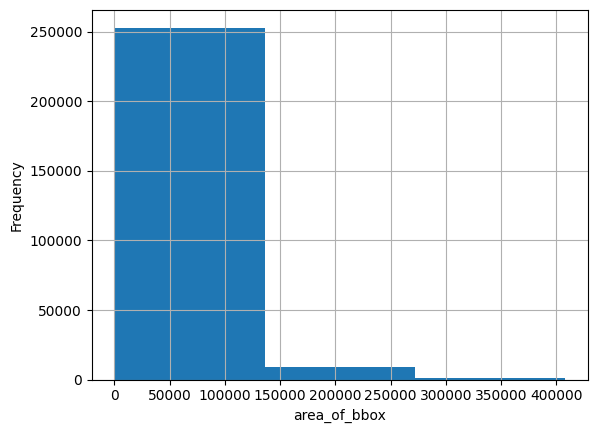

In [11]:
df['area'].hist(bins=3)  
plt.xlabel('area_of_bbox')
plt.ylabel('Frequency')
plt.show()

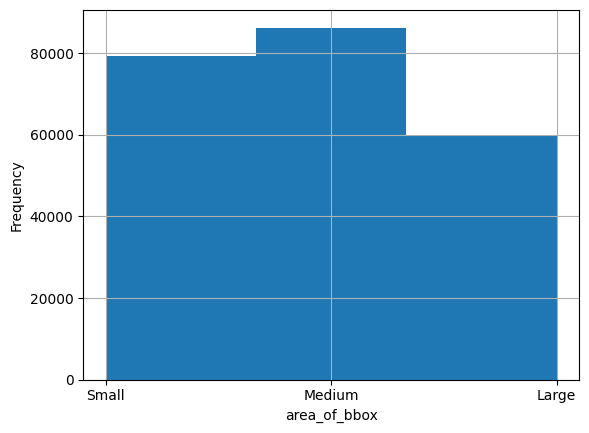

In [12]:
df['direct_cut_based_on_log_area'].hist(bins=3)  
plt.xlabel('area_of_bbox')
plt.ylabel('Frequency')
plt.show()